In [18]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings

import mplcyberpunk

from matplotlib import rc
plt.style.use('cyberpunk')
warnings.filterwarnings("ignore")

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [9]:
train = pd.read_csv("/Users/tastebread/Desktop/kaggle/titanic/train.csv")
test = pd.read_csv("/Users/tastebread/Desktop/kaggle/titanic/test.csv")
gender = pd.read_csv("/Users/tastebread/Desktop/kaggle/titanic/gender_submission.csv")

In [10]:
display(train.head(5))
display(test.head(5))
display(gender.head(5))

display(train.dtypes)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

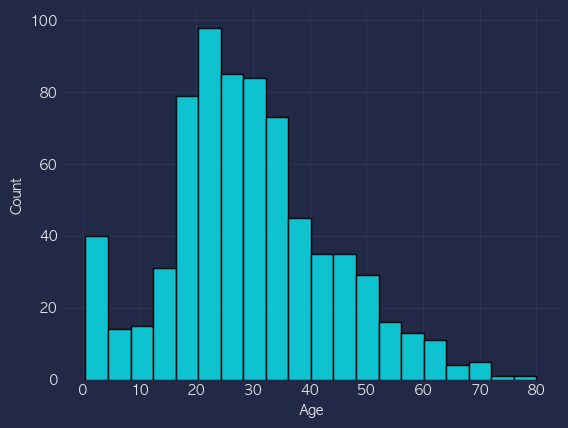

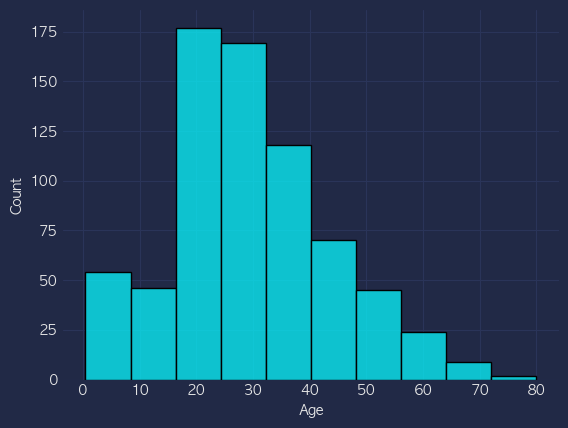

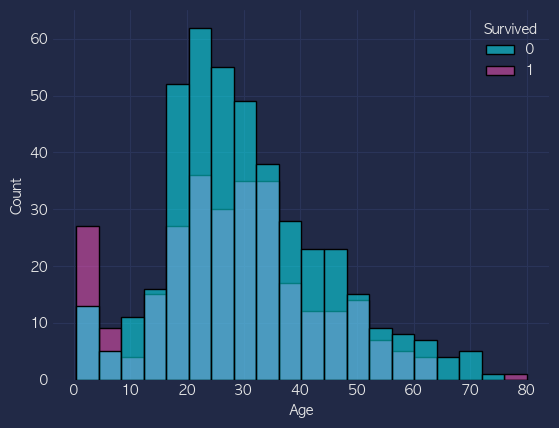

<AxesSubplot:xlabel='Age', ylabel='Count'>

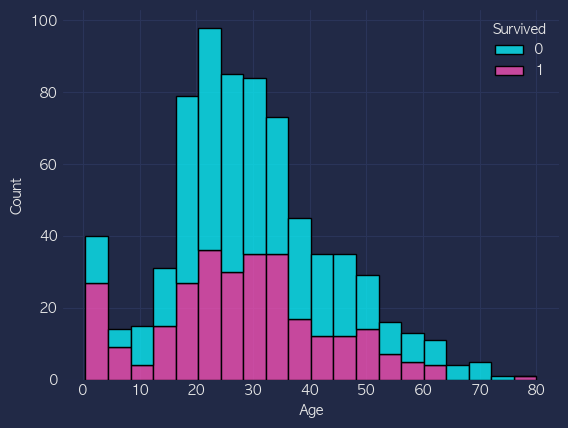

In [11]:
"""수치형 데이터 시각화"""
#히스토그램(histplot) : 빈도수를 나타내는 수치형 그래프

sns.histplot(data=train, x='Age')
plt.show()
sns.histplot(data=train, x='Age',bins=10)  # 구간을 10으로 고정하고 싶을때 bins 사용
plt.show()
sns.histplot(data=train,x='Age',hue='Survived') # 나이빈도를 특정 범주별로 구분해서 보고싶을때는 hue 사용
plt.show()
sns.histplot(data=train,x='Age',hue='Survived',multiple='stack') # 서로 겹친 부분없이 포개지 않고 생존자 수와 사망자 수를 누적해서 표현해보기


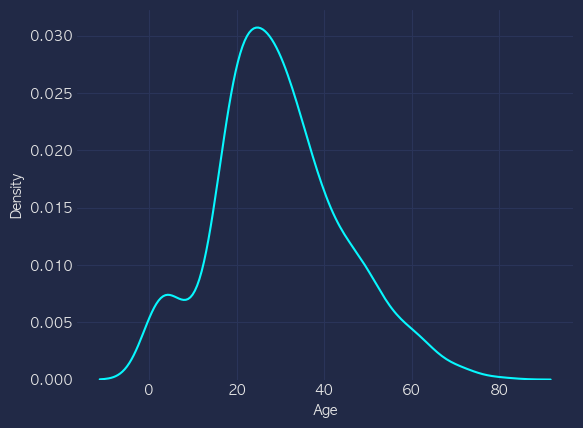

<AxesSubplot:xlabel='Age', ylabel='Density'>

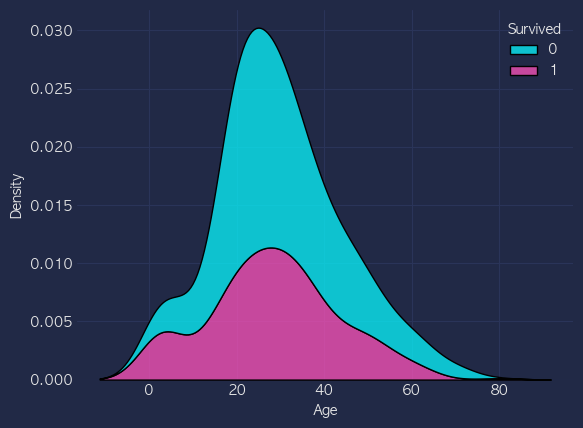

In [12]:
#커널밀도(kdeplot) 추청 : 히스토그램을 매끄럽게 곡선으로 연결한 그래프

sns.kdeplot(data=train,x='Age')
plt.show()
sns.kdeplot(data=train,x='Age',hue='Survived',multiple='stack')

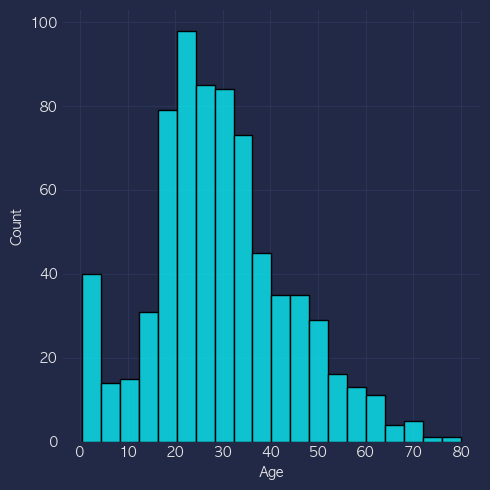

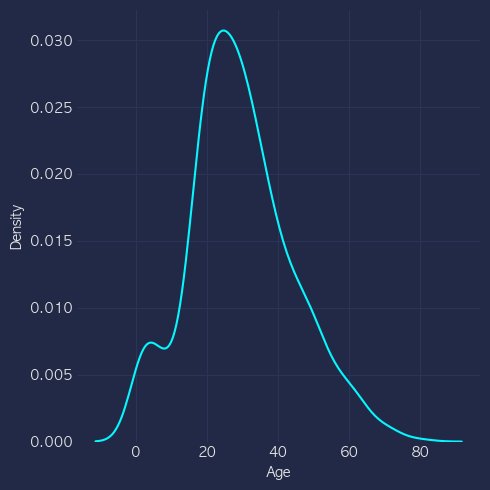

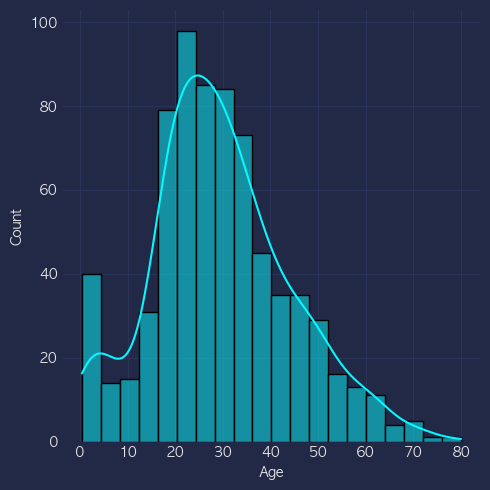

In [13]:
#분포도(distplot) : 수치형 데이터 하나의 분포를 나타내는 그래프, Kaggle에서 분포도를 그릴 땐 distplot()을 많이 사용한다.

sns.displot(data=train,x='Age') #히스토그램과 똑같고 크기만 다르다
plt.show()
sns.displot(data=train,x='Age',kind='kde') # kdeplot으로 그린 결과와 같고 그래프 크기만 다르다
plt.show()
sns.displot(data=train,x='Age', kde=True) # 히스토그램과 커널밀도추정 함수 그래프를 동시에 그릴 수 있다.


<AxesSubplot:xlabel='Age', ylabel='Density'>

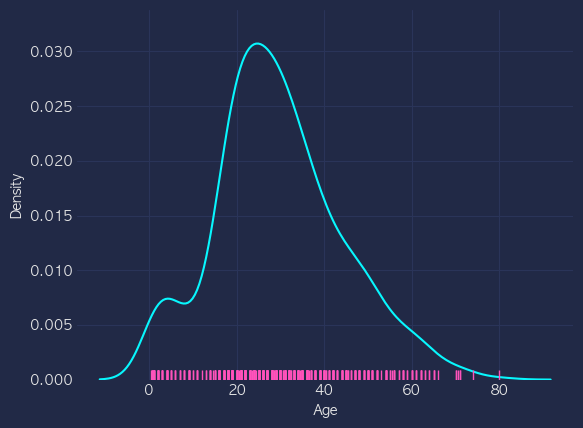

In [14]:
#러그 플롯(rugplot) : 주변 분포를 나타내는 그래프, 단독으로 사용하지 않고 주로 다른 분포도 그래프와 함께 사용한다.

sns.kdeplot(data=train, x='Age')
sns.rugplot(data=train, x='Age') #x축의 작은 선분이 rug

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

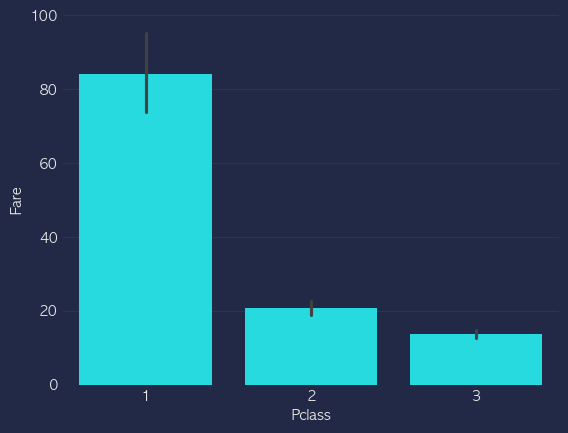

In [16]:
"""범주형 데이터 시각화"""
#막대 그래프(barplot) : 범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악할 때 사용
#barplot은 범주형 데이터에 따른 수치형 데이터의 평균과, 신뢰구간을 그려준다. 수치형 데이터 평균은 막대 높이로, 신뢰구간은 오차 막대로 표현
sns.barplot(x='Pclass',y='Fare',data=train) # x 파라미터에 범주형 데이터, y 파라미터에 수치형 데이터를 전달.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

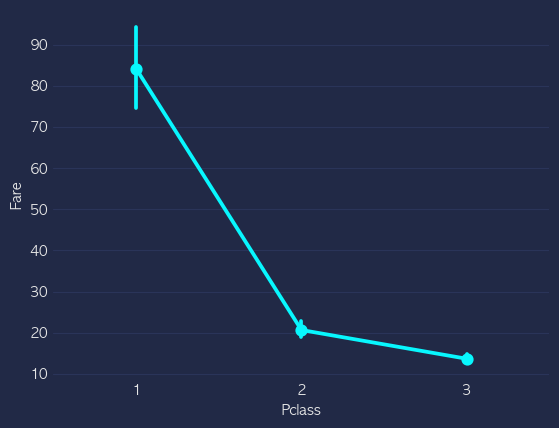

In [17]:
#포인트플롯(pointplot) : 막대그래프와 모양만 다를 뿐 동일한 정보를 제공한다. 다만 그래프를 점과 선으로 나타낸다.
#한 화면에 여러 그래프를 그릴때 사용한다.
sns.pointplot(x='Pclass',y='Fare',data=train)

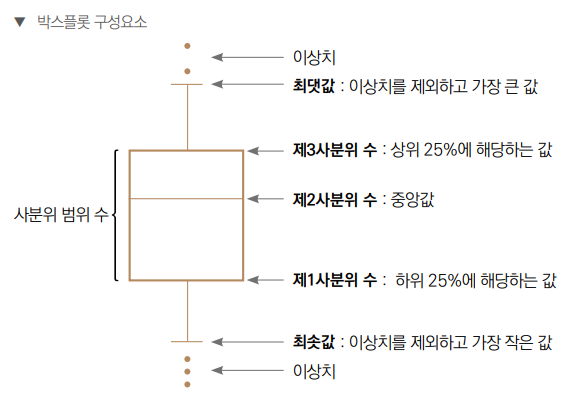

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

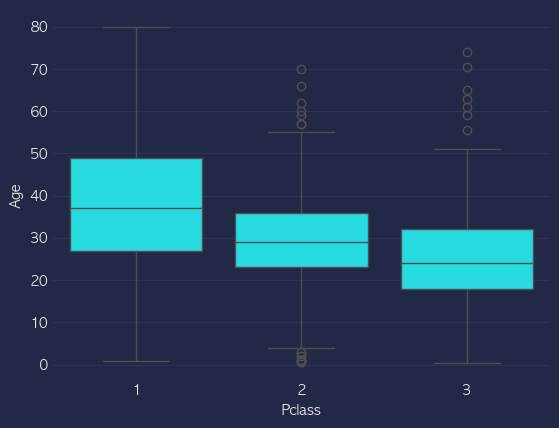

In [26]:
#박스플롯(boxplot) : 막대,포인트플롯보다 더 많은 정보를, 구체적으로 5가지 요약 수치를 제공한다.
"""
5가지 요약 수치
제1사분위 수(Q1) : 전체 데이터 중 하위 25% 해당하는 값
제2사분위 수(Q2) : 50%에 해당하는 값(중앙값)
제3사분위 수(Q3) : 상위 25%에 해당하는 값
사분위 범위 수(IQR) : Q3 - Q1
최댓값 : Q3 + (1.5 * IQR)
최솟값 : Q1 - (1.5 * IQR)
이상치 : 최댓값보다 큰 값과 최솟값보다 작은 값.
"""
display(Image("/Users/tastebread/Desktop/kaggle/titanic/박스플롯.png"))

sns.boxplot(x='Pclass',y='Age',data=train)

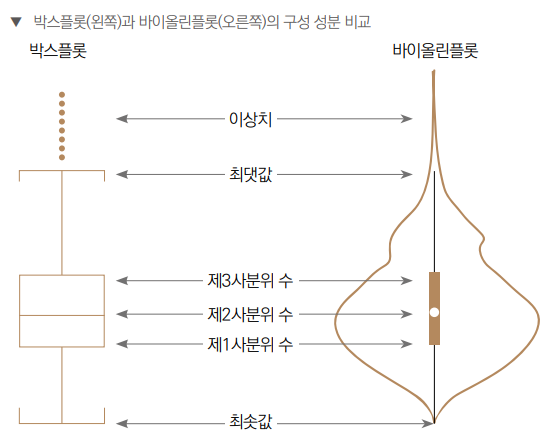

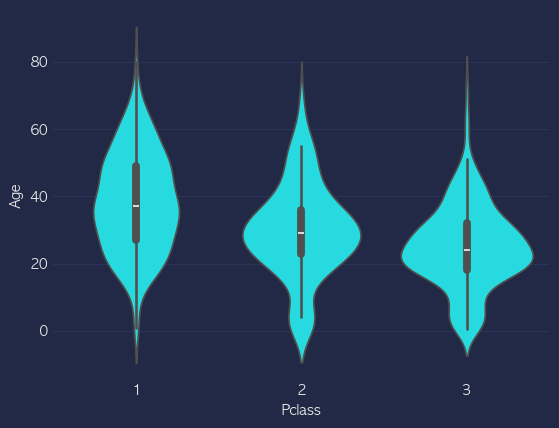

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

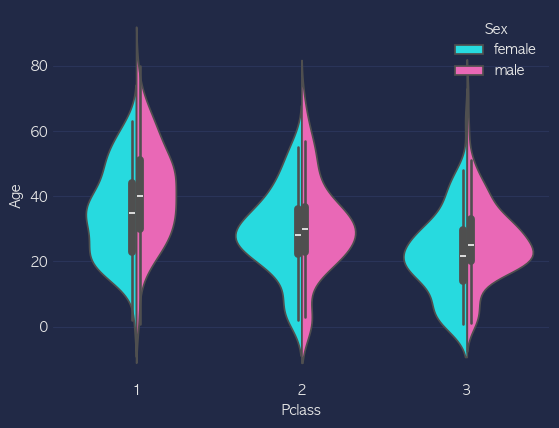

In [27]:
#바이올렛플롯 : 박스플롯,커널밀도추정 함수 그래프를 합쳐 놓은 그래프.
display(Image("/Users/tastebread/Desktop/kaggle/titanic/바이올렛플롯.png"))
sns.violinplot(x='Pclass',y='Age',data=train)
plt.show()
sns.violinplot(x='Pclass',y='Age',hue='Sex',data=train,split=True)
# 성별에 등급별 나이 분포 살펴보기, split=True로 전달하면 hue에 전달한 피처를 반으로 나누어 보여줍니다.


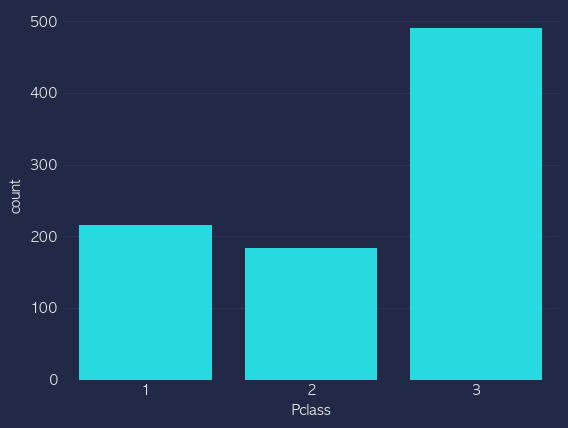

<AxesSubplot:xlabel='count', ylabel='Pclass'>

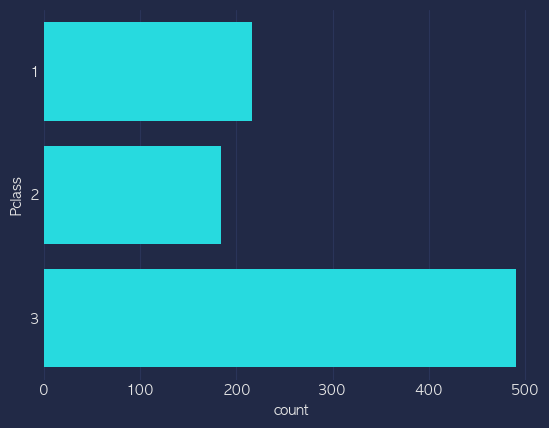

In [30]:
#카운터플롯(count) : 범주형 데이터의 개수를 확인할 때 사용하는 그래프 주로 범주형 피처나 범주형 타깃값의 분포가 어떤지 파악할 때 사용
sns.countplot(x='Pclass',data=train)
plt.show()
sns.countplot(y='Pclass',data=train)

([<matplotlib.patches.Wedge at 0x1211564c0>,
 [Text(1.0461621663333946, 0.3399186987098808, 'A'),
  Text(-0.8899187482945419, 0.6465637025335369, 'B'),
  Text(0.6465639524941308, -0.8899185666875186, 'C')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.0%'),
  Text(-0.4854102263424773, 0.3526711104728383, '60.0%'),
  Text(0.35267124681498035, -0.485410127284101, '30.0%')])

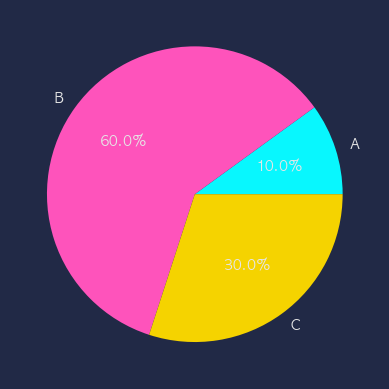

In [31]:
#파이 그래프(pie) : 범주형 데이터별 비율을 알아볼 때 사용하기 좋은 그래프.

x = [10,60,30]
labels = ['A','B','C']

plt.pie(x=x,labels=labels, autopct='%.1f%%')

In [38]:
"""데이터 관계 시각화 : 여러 데이터 사이의 관계를 살펴보기 위한 그래프"""
#히트맵(heatmap) : 데이터 간 관계를 색상으로 표현한 그래프, 비교해야 할 데이터가 많을 때 주로 사용
flights = sns.load_dataset('flights')

flights.head(5)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='month'>

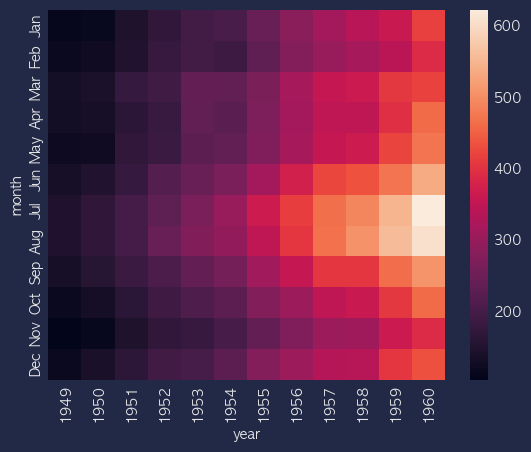

In [39]:
"""
히트맵을 그리는 데 활용하려면 데이터 구조를 바꿔줘야한다. 판다스의 pivot() 함수를 활용해서 바꿔주기
"""
fights_pivot = flights.pivot(index='month',
                             columns='year',
                             values='passengers')

fights_pivot

sns.heatmap(data=fights_pivot)

<AxesSubplot:xlabel='year', ylabel='passengers'>

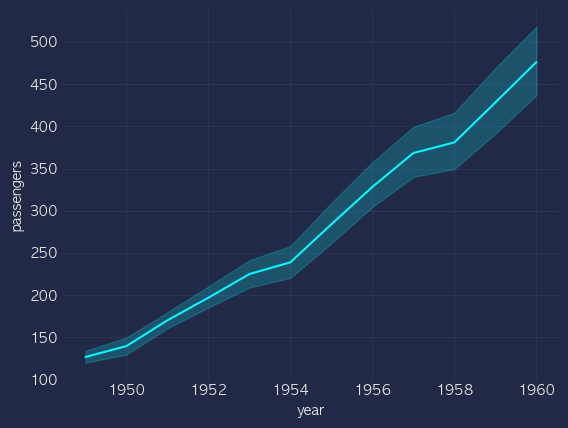

In [40]:
#라인플롯(lineplot) : 두 수치형 데이터 사이의 관계를 나타낼 때 사용

sns.lineplot(x='year', y='passengers',data=flights) #실선 주의의 음영은 95% 신뢰구간을 나타낸다.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


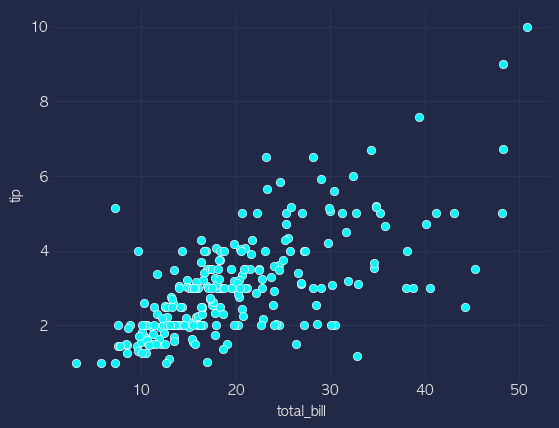

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

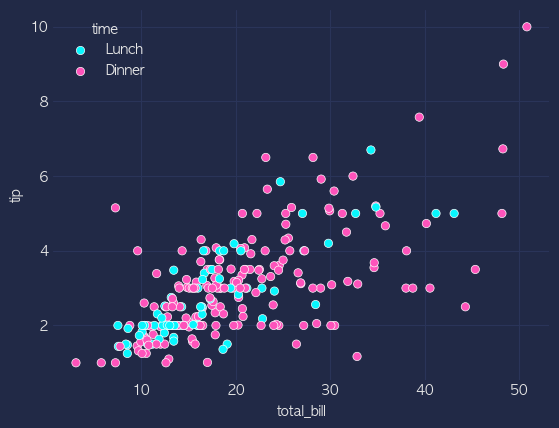

In [45]:
#산점도(scatter) : 두 데이터의 관계를 점으로 표현하는 그래프
tips = sns.load_dataset('tips')
display(tips.head(5))

sns.scatterplot(x='total_bill',y='tip',data=tips)
plt.show()
sns.scatterplot(x='total_bill',y='tip',hue='time',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

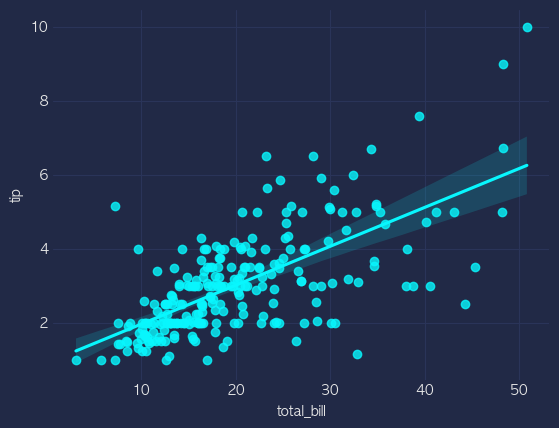

In [46]:
#회귀선을 포함한 산점도 그래프(regplot) : 산점도와 선형 회귀선을 동시에 그려주는 함수.
sns.regplot(x='total_bill',y='tip',data=tips) #선형 회귀선 주변 음영은 95% 신뢰구간을 나타낸다.
plt.show()
sns.regplot(x='total_bill',y='tip',ci=99,data=tips)